In [ ]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
print(df.columns)

Index(['Please.choose.the.language...Lütfen.dil.seçiniz', 'gender',
       'education', 'faculty', 'metaverse.concept', 'virtualexperience',
       'Metaversethougts', 'development.area', 'metaverseleader', 'laws',
       'which.social.media', 'socialmediatime', 'human.rights.change',
       'achievementshappiness', 'scares.me', 'metaverseethic', 'spend.my.time',
       'metaversesocioeconomic', 'compatibility.issues',
       'cybercendrommetaverse'],
      dtype='object')


In [ ]:
print(social_media_counts)

which.social.media
Whatsapp         368
Instagram        334
Youtube          323
Twitter          227
Facebook         142
Telegram         137
Linkedin         111
Snapchat          87
Tiktok            35
discord            2
Reddit             2
ekşi sözlük        1
Reddit, 4chan      1
Signal             1
Letterboxd         1
Bip                1
Pinterest          1
Name: count, dtype: int64


In [ ]:
total_respondents = 381
print(f"Total respondents: {total_respondents}")

Total respondents: 381


In [ ]:
proportions = social_media_counts / total_respondents
print(proportions)

which.social.media
Whatsapp         0.965879
Instagram        0.876640
Youtube          0.847769
Twitter          0.595801
Facebook         0.372703
Telegram         0.359580
Linkedin         0.291339
Snapchat         0.228346
Tiktok           0.091864
discord          0.005249
Reddit           0.005249
ekşi sözlük      0.002625
Reddit, 4chan    0.002625
Signal           0.002625
Letterboxd       0.002625
Bip              0.002625
Pinterest        0.002625
Name: count, dtype: float64


In [ ]:
import numpy as np

def wilson_score_interval(p, n, z=1.96):
    if p == 0:
        lower = 0.0
        upper = (z*z) / (n + z*z)
    elif p == 1:
        lower = 1 - (z*z) / (n + z*z)
        upper = 1.0
    else:
        denominator = 1 + z*z/n
        center_of_interval = p + z*z/(2*n)
        margin_of_error = z * np.sqrt(p*(1-p)/n + z*z/(4*n*n))

        lower = (center_of_interval - margin_of_error) / denominator
        upper = (center_of_interval + margin_of_error) / denominator

    return max(0, lower), min(1, upper)

print("wilson_score_interval function defined.")

wilson_score_interval function defined.


In [ ]:
confidence_intervals = []
for platform, count in social_media_counts.items():
    proportion = proportions[platform]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals.append({'platform': platform, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df = pd.DataFrame(confidence_intervals)
print("Confidence intervals calculated and stored in a DataFrame.")

Confidence intervals calculated and stored in a DataFrame.


In [ ]:
results_df['proportion_percent'] = (results_df['proportion'] * 100).round(2)
results_df['lower_ci_percent'] = (results_df['lower_ci'] * 100).round(2)
results_df['upper_ci_percent'] = (results_df['upper_ci'] * 100).round(2)

results_df['95% Wilson CI'] = results_df.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table = results_df[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table = final_table.rename(columns={'platform': 'Social Media Platform', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table.to_string(index=False))

Social Media Platform  Count  Proportion (%)  95% Wilson CI
             Whatsapp    368           96.59  [94.25--98.0]
            Instagram    334           87.66  [83.98--90.6]
              Youtube    323           84.78 [80.82--88.04]
              Twitter    227           59.58 [54.58--64.39]
             Facebook    142           37.27 [32.56--42.23]
             Telegram    137           35.96  [31.3--40.89]
             Linkedin    111           29.13  [24.8--33.89]
             Snapchat     87           22.83  [18.9--27.31]
               Tiktok     35            9.19  [6.68--12.51]
              discord      2            0.52   [0.14--1.89]
               Reddit      2            0.52   [0.14--1.89]
          ekşi sözlük      1            0.26   [0.05--1.47]
        Reddit, 4chan      1            0.26   [0.05--1.47]
               Signal      1            0.26   [0.05--1.47]
           Letterboxd      1            0.26   [0.05--1.47]
                  Bip      1            

In [ ]:
social_media_time_counts = df['socialmediatime'].value_counts()
social_media_time_proportions = social_media_time_counts / total_respondents

confidence_intervals_social_media_time = []
for category, count in social_media_time_counts.items():
    proportion = social_media_time_proportions[category]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals_social_media_time.append({'platform': category, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df_social_media_time = pd.DataFrame(confidence_intervals_social_media_time)

results_df_social_media_time['proportion_percent'] = (results_df_social_media_time['proportion'] * 100).round(2)
results_df_social_media_time['lower_ci_percent'] = (results_df_social_media_time['lower_ci'] * 100).round(2)
results_df_social_media_time['upper_ci_percent'] = (results_df_social_media_time['upper_ci'] * 100).round(2)

results_df_social_media_time['95% Wilson CI'] = results_df_social_media_time.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table_social_media_time = results_df_social_media_time[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table_social_media_time = final_table_social_media_time.rename(columns={'platform': 'Social Media Time (Daily Hours)', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table_social_media_time.to_string(index=False))

Social Media Time (Daily Hours)  Count  Proportion (%)  95% Wilson CI
                            2-3    194           50.92  [45.91--55.9]
                            4-5     93           24.41 [20.37--28.96]
                 1 veya daha az     53           13.91 [10.79--17.75]
                            6-7     34            8.92  [6.46--12.21]
                8 ve daha fazla      7            1.84   [0.89--3.74]


In [ ]:
virtual_experience_counts = df['virtualexperience'].value_counts()
virtual_experience_proportions = virtual_experience_counts / total_respondents

confidence_intervals_virtual_experience = []
for category, count in virtual_experience_counts.items():
    proportion = virtual_experience_proportions[category]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals_virtual_experience.append({'platform': category, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df_virtual_experience = pd.DataFrame(confidence_intervals_virtual_experience)

results_df_virtual_experience['proportion_percent'] = (results_df_virtual_experience['proportion'] * 100).round(2)
results_df_virtual_experience['lower_ci_percent'] = (results_df_virtual_experience['lower_ci'] * 100).round(2)
results_df_virtual_experience['upper_ci_percent'] = (results_df_virtual_experience['upper_ci'] * 100).round(2)

results_df_virtual_experience['95% Wilson CI'] = results_df_virtual_experience.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table_virtual_experience = results_df_virtual_experience[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table_virtual_experience = final_table_virtual_experience.rename(columns={'platform': 'Virtual Experience', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table_virtual_experience.to_string(index=False))

Virtual Experience  Count  Proportion (%) 95% Wilson CI
             Hayır    246           64.57 [59.64--69.2]
              Evet    135           35.43 [30.8--40.36]


In [ ]:
education_counts = df['education'].value_counts()
education_proportions = education_counts / total_respondents

confidence_intervals_education = []
for category, count in education_counts.items():
    proportion = education_proportions[category]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals_education.append({'platform': category, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df_education = pd.DataFrame(confidence_intervals_education)

results_df_education['proportion_percent'] = (results_df_education['proportion'] * 100).round(2)
results_df_education['lower_ci_percent'] = (results_df_education['lower_ci'] * 100).round(2)
results_df_education['upper_ci_percent'] = (results_df_education['upper_ci'] * 100).round(2)

results_df_education['95% Wilson CI'] = results_df_education.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table_education = results_df_education[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table_education = final_table_education.rename(columns={'platform': 'Education Level', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table_education.to_string(index=False))

Education Level  Count  Proportion (%)  95% Wilson CI
         Lisans    265           69.55 [64.76--73.96]
  Yüksek Lisans     77           20.21 [16.48--24.53]
        Doktora     39           10.24  [7.58--13.69]


In [ ]:
gender_counts = df['gender'].value_counts()
gender_proportions = gender_counts / total_respondents

confidence_intervals_gender = []
for category, count in gender_counts.items():
    proportion = gender_proportions[category]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals_gender.append({'platform': category, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df_gender = pd.DataFrame(confidence_intervals_gender)

results_df_gender['proportion_percent'] = (results_df_gender['proportion'] * 100).round(2)
results_df_gender['lower_ci_percent'] = (results_df_gender['lower_ci'] * 100).round(2)
results_df_gender['upper_ci_percent'] = (results_df_gender['upper_ci'] * 100).round(2)

results_df_gender['95% Wilson CI'] = results_df_gender.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table_gender = results_df_gender[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table_gender = final_table_gender.rename(columns={'platform': 'Gender', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table_gender.to_string(index=False))

               Gender  Count  Proportion (%)  95% Wilson CI
                Erkek    189           49.61 [44.61--54.61]
                Kadın    186           48.82 [43.84--53.82]
Belirtmek İstemiyorum      6            1.57   [0.72--3.39]


In [ ]:
faculty_counts = df['faculty'].value_counts()
faculty_proportions = faculty_counts / total_respondents

confidence_intervals_faculty = []
for category, count in faculty_counts.items():
    proportion = faculty_proportions[category]
    lower, upper = wilson_score_interval(proportion, total_respondents)
    confidence_intervals_faculty.append({'platform': category, 'count': count, 'proportion': proportion, 'lower_ci': lower, 'upper_ci': upper})

results_df_faculty = pd.DataFrame(confidence_intervals_faculty)

results_df_faculty['proportion_percent'] = (results_df_faculty['proportion'] * 100).round(2)
results_df_faculty['lower_ci_percent'] = (results_df_faculty['lower_ci'] * 100).round(2)
results_df_faculty['upper_ci_percent'] = (results_df_faculty['upper_ci'] * 100).round(2)

results_df_faculty['95% Wilson CI'] = results_df_faculty.apply(lambda row: f"[{row['lower_ci_percent']}--{row['upper_ci_percent']}]", axis=1)

final_table_faculty = results_df_faculty[['platform', 'count', 'proportion_percent', '95% Wilson CI']]
final_table_faculty = final_table_faculty.rename(columns={'platform': 'Faculty', 'count': 'Count', 'proportion_percent': 'Proportion (%)'})

print(final_table_faculty.to_string(index=False))

                                   Faculty  Count  Proportion (%) 95% Wilson CI
      İktisadi ve İdari Bilimler Fakültesi    146           38.32 [33.58--43.3]
                     Mühendislik Fakültesi     75           19.69 [16.0--23.97]
                    Fen Edebiyat Fakültesi     33            8.66 [6.23--11.91]
                          Eğitim Fakültesi     32            8.40 [6.01--11.62]
                           Hukuk Fakültesi     12            3.15  [1.81--5.42]
                        İletişim fakültesi      4            1.05  [0.41--2.67]
                        İletişim Fakültesi      4            1.05  [0.41--2.67]
                                       Tıp      4            1.05  [0.41--2.67]
                   Faculty of Architecture      3            0.79  [0.27--2.29]
                                Hemşirelik      3            0.79  [0.27--2.29]
                Sağlık bilimleri fakültesi      3            0.79  [0.27--2.29]
                Sağlık Bilimleri Enstitü

In [ ]:
print("Counts for 'Metaversethougts' column:")
print(df['Metaversethougts'].value_counts())

print("\nCounts for 'spend.my.time' column:")
print(df['spend.my.time'].value_counts())

Counts for 'Metaversethougts' column:
Metaversethougts
Metaverse'ü keşfetmek için biraz zaman harcamak istiyorum                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 166
Hala Metaverse'ün ne olduğunu anlamıyorum.                                                                                                                                                                                                                                                                                                         

In [ ]:
df['willingness_to_spend_time'] = df['spend.my.time'].apply(lambda x: 1 if x in ['Katılıyorum', 'Kesinlikle Katılıyorum'] else 0)

print("Dichotomized 'willingness_to_spend_time' column:")
print(df['willingness_to_spend_time'].value_counts())

Dichotomized 'willingness_to_spend_time' column:
willingness_to_spend_time
0    348
1     33
Name: count, dtype: int64


In [ ]:
social_media_time_mapping = {
    '1 veya daha az': 0,
    '2-3': 1,
    '4-5': 2,
    '6-7': 3,
    '8 ve daha fazla': 4
}
df['socialmediatime_encoded'] = df['socialmediatime'].map(social_media_time_mapping)

print("Encoded 'socialmediatime_encoded' column:")
print(df['socialmediatime_encoded'].value_counts())


Encoded 'socialmediatime_encoded' column:
socialmediatime_encoded
1    194
2     93
0     53
3     34
4      7
Name: count, dtype: int64


In [ ]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender', dtype=int)
df = pd.concat([df, gender_encoded], axis=1)

print("One-hot encoded 'gender' columns (first 5 rows):")
print(df[['gender_Erkek', 'gender_Kadın', 'gender_Belirtmek İstemiyorum']].head())

One-hot encoded 'gender' columns (first 5 rows):
   gender_Erkek  gender_Kadın  gender_Belirtmek İstemiyorum
0             1             0                             0
1             1             0                             0
2             1             0                             0
3             1             0                             0
4             1             0                             0


In [ ]:
education_encoded = pd.get_dummies(df['education'], prefix='education', dtype=int)
df = pd.concat([df, education_encoded], axis=1)

print("One-hot encoded 'education' columns (first 5 rows):")
print(df[['education_Lisans', 'education_Yüksek Lisans', 'education_Doktora']].head())

One-hot encoded 'education' columns (first 5 rows):
   education_Lisans  education_Yüksek Lisans  education_Doktora
0                 1                        0                  0
1                 1                        0                  0
2                 1                        0                  0
3                 1                        0                  0
4                 1                        0                  0


In [ ]:
import statsmodels.api as sm

X = df[['socialmediatime_encoded', 'gender_Erkek', 'gender_Kadın', 'education_Lisans', 'education_Yüksek Lisans']]
y = df['willingness_to_spend_time']

X = sm.add_constant(X)


model = sm.Logit(y, X)
result = model.fit(disp=0)

print("Logistic Regression Model Summary:")
print(result.summary())


Logistic Regression Model Summary:
                               Logit Regression Results                              
Dep. Variable:     willingness_to_spend_time   No. Observations:                  381
Model:                                 Logit   Df Residuals:                      375
Method:                                  MLE   Df Model:                            5
Date:                       Tue, 16 Dec 2025   Pseudo R-squ.:                0.009912
Time:                               20:50:05   Log-Likelihood:                -111.14
converged:                             False   LL-Null:                       -112.26
Covariance Type:                   nonrobust   LLR p-value:                    0.8172
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -25.3454   1.32e+05     -0.000      1.000   -2.58e+05    2.58e+05
s

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm

X = df[['socialmediatime_encoded', 'gender_Erkek', 'gender_Belirtmek İstemiyorum', 'education_Lisans', 'education_Yüksek Lisans']]
y = df['willingness_to_spend_time']
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(disp=0)

print("Logistic Regression Model Summary:")
print(result.summary())


Logistic Regression Model Summary:
                               Logit Regression Results                              
Dep. Variable:     willingness_to_spend_time   No. Observations:                  381
Model:                                 Logit   Df Residuals:                      375
Method:                                  MLE   Df Model:                            5
Date:                       Tue, 16 Dec 2025   Pseudo R-squ.:                0.009912
Time:                               20:51:02   Log-Likelihood:                -111.14
converged:                             False   LL-Null:                       -112.26
Covariance Type:                   nonrobust   LLR p-value:                    0.8172
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.3373      0.596     -3.923      0.000      -3.50

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm

X = df[['socialmediatime_encoded', 'gender_Erkek', 'education_Lisans', 'education_Yüksek Lisans']]
y = df['willingness_to_spend_time']

X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit(disp=0)

print("Logistic Regression Model Summary:")
print(result.summary())


Logistic Regression Model Summary:
                               Logit Regression Results                              
Dep. Variable:     willingness_to_spend_time   No. Observations:                  381
Model:                                 Logit   Df Residuals:                      376
Method:                                  MLE   Df Model:                            4
Date:                       Tue, 16 Dec 2025   Pseudo R-squ.:                0.005185
Time:                               20:51:20   Log-Likelihood:                -111.67
converged:                              True   LL-Null:                       -112.26
Covariance Type:                   nonrobust   LLR p-value:                    0.8840
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3506      0.597     -3.940      0.000      -3.520      -1.181
s

In [ ]:
print("Odds Ratios and P-values:")
odds_ratios = pd.DataFrame({
    'Feature': result.params.index,
    'Coefficient': result.params.values,
    'Odds Ratio': np.exp(result.params.values),
    'P-value': result.pvalues.values
})
print(odds_ratios)

print("\n--- Summary of Logistic Regression Results ---")
print(f"Total observations: {result.nobs}")
print(f"Pseudo R-squared: {result.prsquared:.4f}")
print(f"Log-Likelihood Ratio p-value: {result.llr_pvalue:.4f}")

print("\nInterpretation of significant variables:")
significant_vars = odds_ratios[odds_ratios['P-value'] < 0.05]

if not significant_vars.empty:
    for index, row in significant_vars.iterrows():
        feature = row['Feature']
        odds_ratio = row['Odds Ratio']
        p_value = row['P-value']
        if feature == 'socialmediatime_encoded':
            print(f"  - For each unit increase in social media usage (socialmediatime_encoded), the odds of having high willingness to spend time in the Metaverse {'increase' if odds_ratio > 1 else 'decrease'} by {((odds_ratio - 1) * 100):.2f}% (Odds Ratio: {odds_ratio:.2f}, p-value: {p_value:.4f}).")
        elif feature == 'gender_Erkek':
            print(f"  - Compared to 'Kadın' (Female), the odds of 'Erkek' (Male) having high willingness to spend time in the Metaverse {'increase' if odds_ratio > 1 else 'decrease'} by {abs((odds_ratio - 1) * 100):.2f}% (Odds Ratio: {odds_ratio:.2f}, p-value: {p_value:.4f}).")
        elif feature.startswith('education_'):
            education_level = feature.split('_')[1]
            print(f"  - Compared to 'Doktora' education level, the odds of '{education_level}' having high willingness to spend time in the Metaverse {'increase' if odds_ratio > 1 else 'decrease'} by {abs((odds_ratio - 1) * 100):.2f}% (Odds Ratio: {odds_ratio:.2f}, p-value: {p_value:.4f}).")
        else:
             print(f"  - The feature '{feature}' is statistically significant (Odds Ratio: {odds_ratio:.2f}, p-value: {p_value:.4f}).")
else:
    print("  - No statistically significant variables found at p < 0.05.")

print("\nOverall Model Fit:")
if result.llr_pvalue < 0.05:
    print("  - The overall model is statistically significant, suggesting that the independent variables as a group contribute to explaining the willingness to spend time in the Metaverse.")
else:
    print("  - The overall model is not statistically significant (p > 0.05), indicating that the independent variables as a group do not significantly explain the willingness to spend time in the Metaverse.")

Odds Ratios and P-values:
                   Feature  Coefficient  Odds Ratio   P-value
0                    const    -2.350598    0.095312  0.000082
1  socialmediatime_encoded     0.159039    1.172383  0.439500
2             gender_Erkek     0.041879    1.042768  0.911105
3         education_Lisans    -0.366381    0.693239  0.534983
4  education_Yüksek Lisans     0.002572    1.002575  0.996831

--- Summary of Logistic Regression Results ---
Total observations: 381
Pseudo R-squared: 0.0052
Log-Likelihood Ratio p-value: 0.8840

Interpretation of significant variables:
  - The feature 'const' is statistically significant (Odds Ratio: 0.10, p-value: 0.0001).

Overall Model Fit:
  - The overall model is not statistically significant (p > 0.05), indicating that the independent variables as a group do not significantly explain the willingness to spend time in the Metaverse.


## Analyze Virtual Experience vs. Willingness

In [ ]:
crosstab_virtualexperience_willingness = pd.crosstab(df['virtualexperience'], df['willingness_to_spend_time'])
print("Cross-tabulation (Counts):")
print(crosstab_virtualexperience_willingness)

# Calculate conditional proportions (percentage within each virtualexperience category)
conditional_proportions = crosstab_virtualexperience_willingness.div(crosstab_virtualexperience_willingness.sum(axis=1), axis=0)
print("\nConditional Proportions (Percentage within virtualexperience category):")
print(conditional_proportions)

Cross-tabulation (Counts):
willingness_to_spend_time    0   1
virtualexperience                 
Evet                       122  13
Hayır                      226  20

Conditional Proportions (Percentage within virtualexperience category):
willingness_to_spend_time         0         1
virtualexperience                            
Evet                       0.903704  0.096296
Hayır                      0.918699  0.081301


In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(crosstab_virtualexperience_willingness)

print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=crosstab_virtualexperience_willingness.index, columns=crosstab_virtualexperience_willingness.columns))



Chi-square Test Results:
Chi2 Statistic: 0.0945
P-value: 0.7586
Degrees of Freedom: 1

Expected Frequencies:
willingness_to_spend_time           0          1
virtualexperience                               
Evet                       123.307087  11.692913
Hayır                      224.692913  21.307087


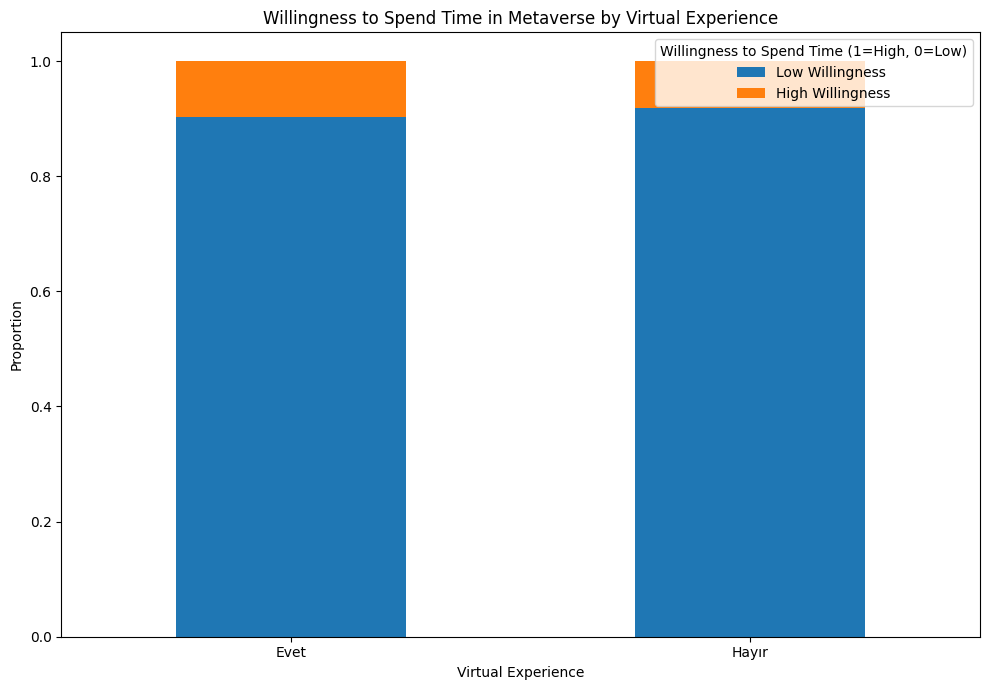

Stacked bar chart visualizing the association between 'virtualexperience' and 'willingness_to_spend_time' has been generated.


In [ ]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
conditional_proportions.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Willingness to Spend Time in Metaverse by Virtual Experience')
plt.xlabel('Virtual Experience')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Willingness to Spend Time (1=High, 0=Low)', labels=['Low Willingness', 'High Willingness'])
plt.tight_layout()
plt.show()
print("Stacked bar chart visualizing the association between 'virtualexperience' and 'willingness_to_spend_time' has been generated.")

## Analyze Metaverse Concept vs. Willingness


In [ ]:
top_four_categories = [
    "Metaverse'ü keşfetmek için biraz zaman harcamak istiyorum",
    "Hala Metaverse'ün ne olduğunu anlamıyorum.",
    "Gerçek ya da sanal hayatımda  Metaverse'e ihtiyacım yok",
    "Bence Metaverse şirketlerin reklamlarını sergilediği bir yer"
]

def group_metaverse_concept(concept):
    if concept in top_four_categories:
        return concept
    else:
        return 'Other'

df['metaverse_concept_grouped'] = df['Metaversethougts'].apply(group_metaverse_concept)

print("Grouped 'metaverse_concept_grouped' column counts:")
print(df['metaverse_concept_grouped'].value_counts())

Grouped 'metaverse_concept_grouped' column counts:
metaverse_concept_grouped
Metaverse'ü keşfetmek için biraz zaman harcamak istiyorum       166
Hala Metaverse'ün ne olduğunu anlamıyorum.                      104
Gerçek ya da sanal hayatımda  Metaverse'e ihtiyacım yok          59
Bence Metaverse şirketlerin reklamlarını sergilediği bir yer     44
Other                                                             8
Name: count, dtype: int64


In [ ]:
crosstab_metaverse_concept_willingness = pd.crosstab(df['metaverse_concept_grouped'], df['willingness_to_spend_time'])
print("Cross-tabulation (Counts):")
print(crosstab_metaverse_concept_willingness)

# Calculate conditional proportions (percentage within each metaverse_concept_grouped category)
conditional_proportions_metaverse_concept = crosstab_metaverse_concept_willingness.div(crosstab_metaverse_concept_willingness.sum(axis=1), axis=0)
print("\nConditional Proportions (Percentage within metaverse_concept_grouped category):")
print(conditional_proportions_metaverse_concept)

Cross-tabulation (Counts):
willingness_to_spend_time                             0   1
metaverse_concept_grouped                                  
Bence Metaverse şirketlerin reklamlarını sergil...   38   6
Gerçek ya da sanal hayatımda  Metaverse'e ihtiy...   57   2
Hala Metaverse'ün ne olduğunu anlamıyorum.           95   9
Metaverse'ü keşfetmek için biraz zaman harcamak...  151  15
Other                                                 7   1

Conditional Proportions (Percentage within metaverse_concept_grouped category):
willingness_to_spend_time                                  0         1
metaverse_concept_grouped                                             
Bence Metaverse şirketlerin reklamlarını sergil...  0.863636  0.136364
Gerçek ya da sanal hayatımda  Metaverse'e ihtiy...  0.966102  0.033898
Hala Metaverse'ün ne olduğunu anlamıyorum.          0.913462  0.086538
Metaverse'ü keşfetmek için biraz zaman harcamak...  0.909639  0.090361
Other                                         

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(crosstab_metaverse_concept_willingness)

print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=crosstab_metaverse_concept_willingness.index, columns=crosstab_metaverse_concept_willingness.columns))


Chi-square Test Results:
Chi2 Statistic: 3.6275
P-value: 0.4588
Degrees of Freedom: 4

Expected Frequencies:
willingness_to_spend_time                                    0          1
metaverse_concept_grouped                                                
Bence Metaverse şirketlerin reklamlarını sergil...   40.188976   3.811024
Gerçek ya da sanal hayatımda  Metaverse'e ihtiy...   53.889764   5.110236
Hala Metaverse'ün ne olduğunu anlamıyorum.           94.992126   9.007874
Metaverse'ü keşfetmek için biraz zaman harcamak...  151.622047  14.377953
Other                                                 7.307087   0.692913


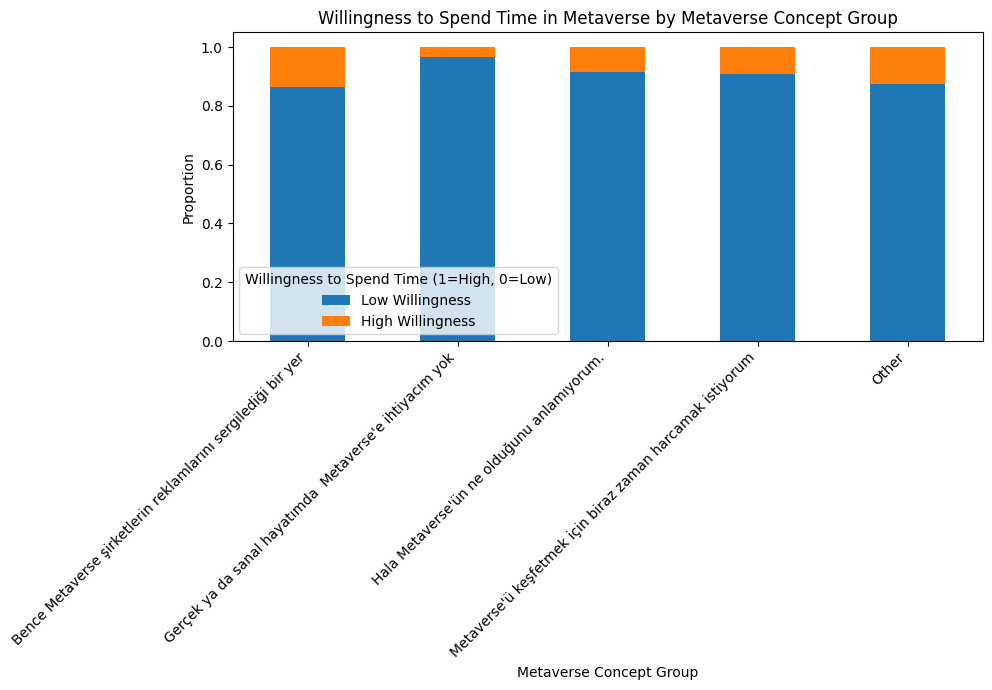

Stacked bar chart visualizing the association between 'metaverse_concept_grouped' and 'willingness_to_spend_time' has been generated.


In [ ]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
conditional_proportions_metaverse_concept.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Willingness to Spend Time in Metaverse by Metaverse Concept Group')
plt.xlabel('Metaverse Concept Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness to Spend Time (1=High, 0=Low)', labels=['Low Willingness', 'High Willingness'])
plt.tight_layout()
plt.show()
print("Stacked bar chart visualizing the association between 'metaverse_concept_grouped' and 'willingness_to_spend_time' has been generated.")

## Analyze Fears ('scares.me') vs. Willingness

In [ ]:
from scipy.stats import chi2_contingency

crosstab_scares_me_willingness = pd.crosstab(df['scares.me'], df['willingness_to_spend_time'])
print("Cross-tabulation (Counts):")
print(crosstab_scares_me_willingness)

conditional_proportions_scares_me = crosstab_scares_me_willingness.div(crosstab_scares_me_willingness.sum(axis=1), axis=0)
print("\nConditional Proportions (Percentage within scares.me category):")
print(conditional_proportions_scares_me)

chi2, p_value, dof, expected = chi2_contingency(crosstab_scares_me_willingness)

print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=crosstab_scares_me_willingness.index, columns=crosstab_scares_me_willingness.columns))

Cross-tabulation (Counts):
willingness_to_spend_time         0   1
scares.me                              
Katılmıyorum                     50   3
Katılıyorum                     141  17
Kesinlikle Katılmıyorum          16   1
Kesinlikle Katılıyorum           45   4
Ne katılıyorum ne katılmıyorum   96   8

Conditional Proportions (Percentage within scares.me category):
willingness_to_spend_time              0         1
scares.me                                         
Katılmıyorum                    0.943396  0.056604
Katılıyorum                     0.892405  0.107595
Kesinlikle Katılmıyorum         0.941176  0.058824
Kesinlikle Katılıyorum          0.918367  0.081633
Ne katılıyorum ne katılmıyorum  0.923077  0.076923

Chi-square Test Results:
Chi2 Statistic: 1.7873
P-value: 0.7748
Degrees of Freedom: 4

Expected Frequencies:
willingness_to_spend_time                0          1
scares.me                                            
Katılmıyorum                     48.409449   4.590551

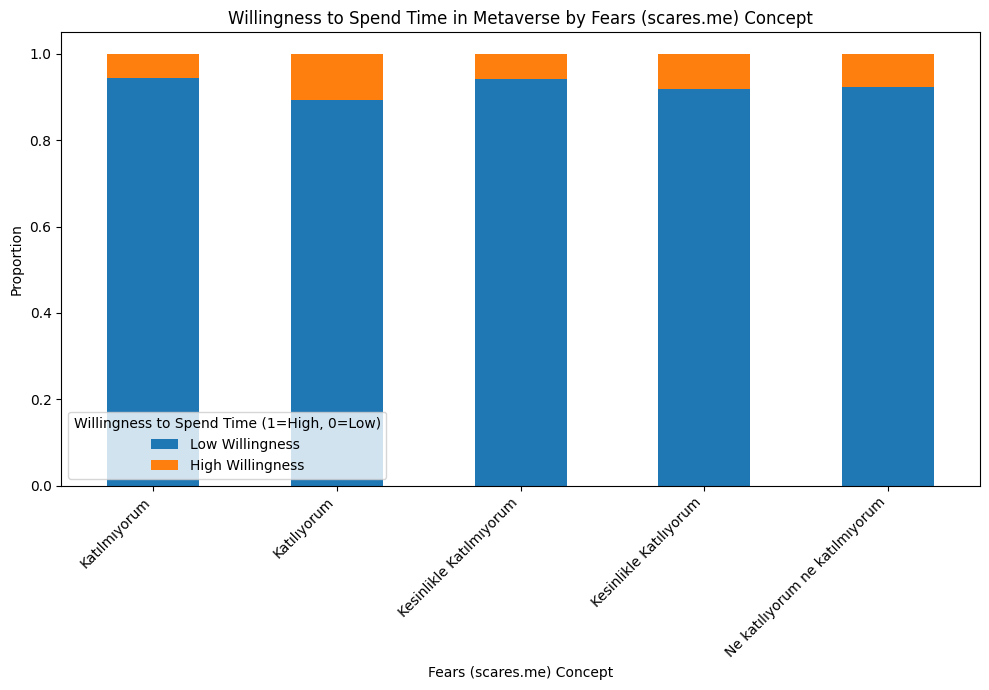

Stacked bar chart visualizing the association between 'scares.me' and 'willingness_to_spend_time' has been generated.


In [ ]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
conditional_proportions_scares_me.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Willingness to Spend Time in Metaverse by Fears (scares.me) Concept')
plt.xlabel('Fears (scares.me) Concept')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness to Spend Time (1=High, 0=Low)', labels=['Low Willingness', 'High Willingness'])
plt.tight_layout()
plt.show()
print("Stacked bar chart visualizing the association between 'scares.me' and 'willingness_to_spend_time' has been generated.")

## Analyze Metaverse Development Area vs. Willingness


In [ ]:
development_area_counts = {}
for areas_str in df['development.area'].dropna():
    areas = [area.strip() for area in areas_str.split(';')]
    for area in areas:
        development_area_counts[area] = development_area_counts.get(area, 0) + 1

development_area_series = pd.Series(development_area_counts)
print("Development Area Counts:")
print(development_area_series)

Development Area Counts:
Sanayi     34
Eğitim     81
Sosyal    208
Sanat      25
Tıp        33
dtype: int64


In [ ]:
from scipy.stats import chi2_contingency

unique_development_areas = development_area_series.index.tolist()

print("\n--- Analyzing each development area vs. Willingness to Spend Time ---\n")

for area in unique_development_areas:
    print(f"\nAnalyzing: {area}")
    df[f'has_{area}'] = df['development.area'].apply(lambda x: 1 if isinstance(x, str) and area in x else 0)
    crosstab_area_willingness = pd.crosstab(df[f'has_{area}'], df['willingness_to_spend_time'])
    print("Cross-tabulation (Counts):")
    print(crosstab_area_willingness)
    conditional_proportions_area = crosstab_area_willingness.div(crosstab_area_willingness.sum(axis=1), axis=0)
    print("Conditional Proportions (Percentage within development area selection):")
    print(conditional_proportions_area)
    chi2, p_value, dof, expected = chi2_contingency(crosstab_area_willingness)

    print("Chi-square Test Results:")
    print(f"  Chi2 Statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(pd.DataFrame(expected, index=crosstab_area_willingness.index, columns=crosstab_area_willingness.columns))

    df.drop(columns=[f'has_{area}'], inplace=True)



--- Analyzing each development area vs. Willingness to Spend Time ---


Analyzing: Sanayi
Cross-tabulation (Counts):
willingness_to_spend_time    0   1
has_Sanayi                        
0                          316  31
1                           32   2
Conditional Proportions (Percentage within development area selection):
willingness_to_spend_time         0         1
has_Sanayi                                   
0                          0.910663  0.089337
1                          0.941176  0.058824
Chi-square Test Results:
  Chi2 Statistic: 0.0808
  P-value: 0.7762
  Degrees of Freedom: 1
Expected Frequencies:
willingness_to_spend_time           0          1
has_Sanayi                                      
0                          316.944882  30.055118
1                           31.055118   2.944882

Analyzing: Eğitim
Cross-tabulation (Counts):
willingness_to_spend_time    0   1
has_Eğitim                        
0                          278  22
1                        


--- Visualizing each development area vs. Willingness to Spend Time ---



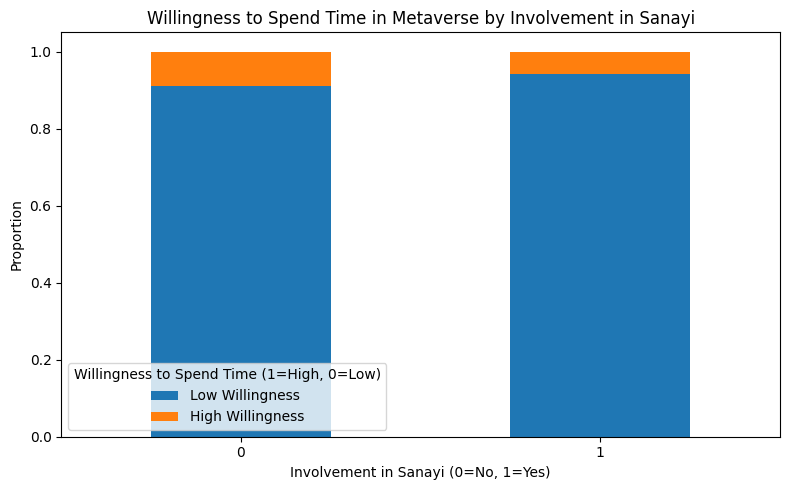

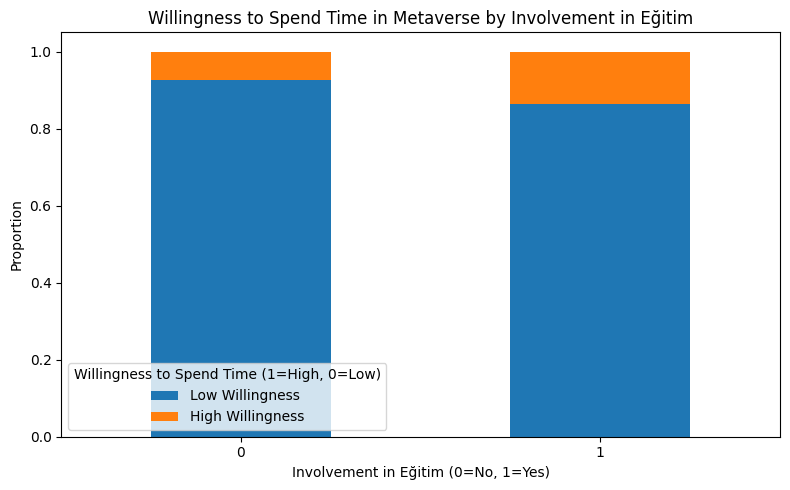

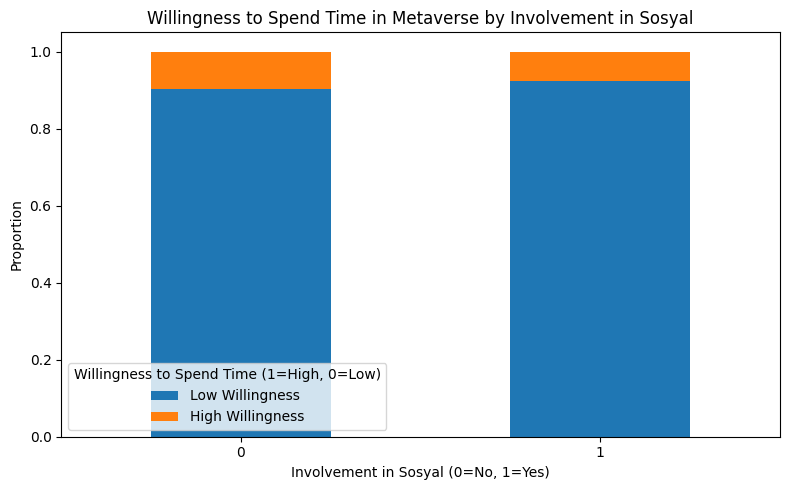

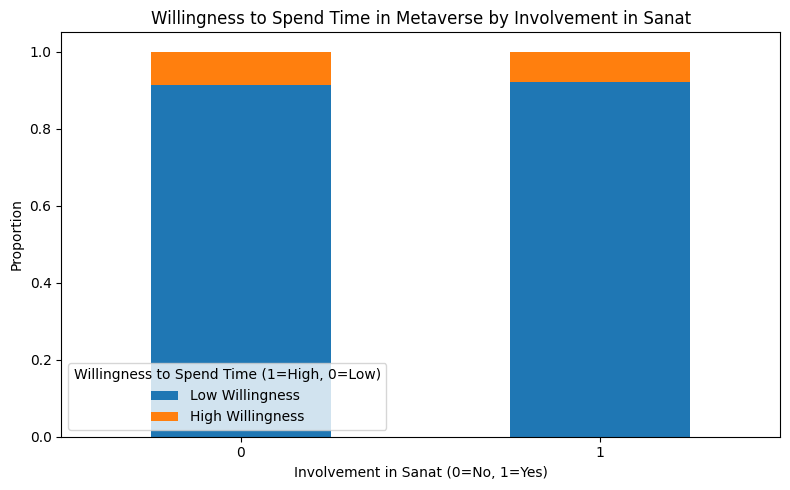

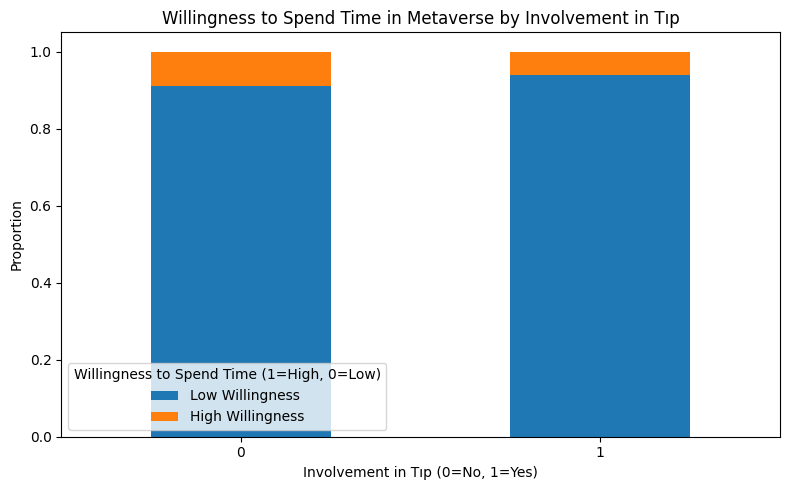

Stacked bar charts visualizing the association between each development area and 'willingness_to_spend_time' have been generated.


In [ ]:
import matplotlib.pyplot as plt

print("\n--- Visualizing each development area vs. Willingness to Spend Time ---\n")

for area in unique_development_areas:

    df[f'has_{area}'] = df['development.area'].apply(lambda x: 1 if isinstance(x, str) and area in x else 0)

    crosstab_area_willingness = pd.crosstab(df[f'has_{area}'], df['willingness_to_spend_time'])

    conditional_proportions_area = crosstab_area_willingness.div(crosstab_area_willingness.sum(axis=1), axis=0)

    conditional_proportions_area.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Willingness to Spend Time in Metaverse by Involvement in {area}')
    plt.xlabel(f'Involvement in {area} (0=No, 1=Yes)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='Willingness to Spend Time (1=High, 0=Low)', labels=['Low Willingness', 'High Willingness'])
    plt.tight_layout()
    plt.show()

    df.drop(columns=[f'has_{area}'], inplace=True)

print("Stacked bar charts visualizing the association between each development area and 'willingness_to_spend_time' have been generated.")

## Analyze Metaverse Ethics vs. Willingness


In [ ]:
crosstab_metaverse_ethics_willingness = pd.crosstab(df['metaverseethic'], df['willingness_to_spend_time'])
print("Cross-tabulation (Counts):")
print(crosstab_metaverse_ethics_willingness)

# Calculate conditional proportions (percentage within each metaverseethic category)
conditional_proportions_metaverse_ethics = crosstab_metaverse_ethics_willingness.div(crosstab_metaverse_ethics_willingness.sum(axis=1), axis=0)
print("\nConditional Proportions (Percentage within metaverseethic category):")
print(conditional_proportions_metaverse_ethics)

Cross-tabulation (Counts):
willingness_to_spend_time         0   1
metaverseethic                         
Katılmıyorum                     39   5
Katılıyorum                      91  15
Kesinlikle Katılmıyorum          24   1
Kesinlikle Katılıyorum           15   8
Ne katılıyorum ne katılmıyorum  179   4

Conditional Proportions (Percentage within metaverseethic category):
willingness_to_spend_time              0         1
metaverseethic                                    
Katılmıyorum                    0.886364  0.113636
Katılıyorum                     0.858491  0.141509
Kesinlikle Katılmıyorum         0.960000  0.040000
Kesinlikle Katılıyorum          0.652174  0.347826
Ne katılıyorum ne katılmıyorum  0.978142  0.021858


In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(crosstab_metaverse_ethics_willingness)

print("\nChi-square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=crosstab_metaverse_ethics_willingness.index, columns=crosstab_metaverse_ethics_willingness.columns))


Chi-square Test Results:
Chi2 Statistic: 34.6672
P-value: 0.0000
Degrees of Freedom: 4

Expected Frequencies:
willingness_to_spend_time                0          1
metaverseethic                                       
Katılmıyorum                     40.188976   3.811024
Katılıyorum                      96.818898   9.181102
Kesinlikle Katılmıyorum          22.834646   2.165354
Kesinlikle Katılıyorum           21.007874   1.992126
Ne katılıyorum ne katılmıyorum  167.149606  15.850394


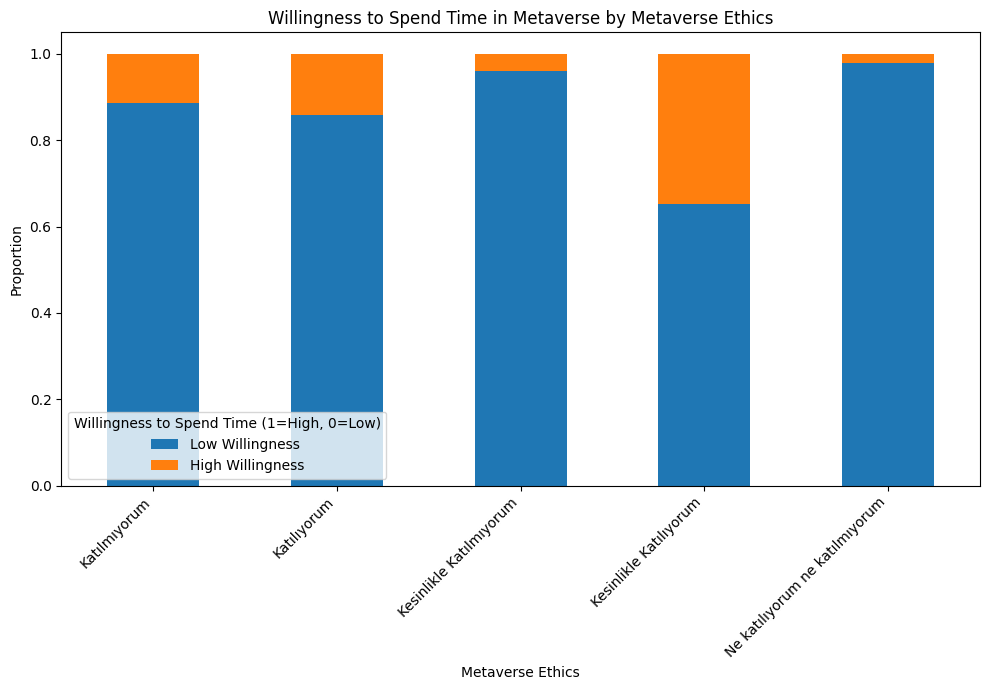

Stacked bar chart visualizing the association between 'metaverseethic' and 'willingness_to_spend_time' has been generated.


In [ ]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
conditional_proportions_metaverse_ethics.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Willingness to Spend Time in Metaverse by Metaverse Ethics')
plt.xlabel('Metaverse Ethics')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness to Spend Time (1=High, 0=Low)', labels=['Low Willingness', 'High Willingness'])
plt.tight_layout()
plt.show()
print("Stacked bar chart visualizing the association between 'metaverseethic' and 'willingness_to_spend_time' has been generated.")

## Virtual Experience Analysis


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency

df['willingness_to_spend_time'] = df['spend.my.time'].apply(lambda x: 1 if x in ['Katılıyorum', 'Kesinlikle Katılıyorum'] else 0)

crosstab_virtualexperience_willingness = pd.crosstab(df['virtualexperience'], df['willingness_to_spend_time'])

fisher_stat, p_value_fisher = fisher_exact(crosstab_virtualexperience_willingness)

chi2_stat, p_val_chi2, dof, ex = chi2_contingency(crosstab_virtualexperience_willingness)

n = crosstab_virtualexperience_willingness.sum().sum()
min_dim = min(crosstab_virtualexperience_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

print("Contingency Table (Virtual Experience vs. Willingness):")
print(crosstab_virtualexperience_willingness)
print(f"\nFisher's Exact Test p-value: {p_value_fisher:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Contingency Table (Virtual Experience vs. Willingness):
willingness_to_spend_time    0   1
virtualexperience                 
Evet                       122  13
Hayır                      226  20

Fisher's Exact Test p-value: 0.7038
Cramér's V: 0.0157


## Gender Analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chi2_contingency

# Ensure dependent variable exists
if 'willingness_to_spend_time' not in df.columns:
    df['willingness_to_spend_time'] = df['spend.my.time'].apply(lambda x: 1 if x in ['Katılıyorum', 'Kesinlikle Katılıyorum'] else 0)

# 1. Filter DataFrame for 'Erkek' and 'Kadın'
df_gender_filtered = df[df['gender'].isin(['Erkek', 'Kadın'])]

# 2. Create contingency table
crosstab_gender_willingness = pd.crosstab(df_gender_filtered['gender'], df_gender_filtered['willingness_to_spend_time'])

# 3. Perform Fisher's Exact Test
fisher_stat, p_value_fisher = fisher_exact(crosstab_gender_willingness)

# 4. Perform Chi-square test to get the statistic for Cramér's V
chi2_stat, p_val_chi2, dof, ex = chi2_contingency(crosstab_gender_willingness)

# 5. Calculate Cramér's V
n = crosstab_gender_willingness.sum().sum()
min_dim = min(crosstab_gender_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

# 6. Print results
print("Contingency Table (Gender vs. Willingness):")
print(crosstab_gender_willingness)
print(f"\nFisher's Exact Test p-value: {p_value_fisher:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Contingency Table (Gender vs. Willingness):
willingness_to_spend_time    0   1
gender                            
Erkek                      173  16
Kadın                      169  17

Fisher's Exact Test p-value: 0.8569
Cramér's V: 0.0025


## Education Analysis


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Ensure dependent variable exists
if 'willingness_to_spend_time' not in df.columns:
    df['willingness_to_spend_time'] = df['spend.my.time'].apply(lambda x: 1 if x in ['Katılıyorum', 'Kesinlikle Katılıyorum'] else 0)

crosstab_education_willingness = pd.crosstab(df['education'], df['willingness_to_spend_time'])

chi2_stat, p_value_chi2, dof, ex = chi2_contingency(crosstab_education_willingness)


n = crosstab_education_willingness.sum().sum()
min_dim = min(crosstab_education_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0


print("Contingency Table (Education vs. Willingness):")
print(crosstab_education_willingness)
print(f"\nChi-square Test p-value: {p_value_chi2:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Contingency Table (Education vs. Willingness):
willingness_to_spend_time    0   1
education                         
Doktora                     35   4
Lisans                     244  21
Yüksek Lisans               69   8

Chi-square Test p-value: 0.7416
Cramér's V: 0.0396


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

crosstab_faculty_willingness = pd.crosstab(df['faculty'], df['willingness_to_spend_time'])

chi2_stat, p_value_chi2, dof, ex = chi2_contingency(crosstab_faculty_willingness)

n = crosstab_faculty_willingness.sum().sum()
min_dim = min(crosstab_faculty_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

print("Contingency Table (Faculty vs. Willingness) - First 5 rows:")
print(crosstab_faculty_willingness.head())
print(f"\nChi-square Test p-value: {p_value_chi2:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Contingency Table (Faculty vs. Willingness) - First 5 rows:
willingness_to_spend_time         0  1
faculty                               
Agricultural Genetic Engineering  2  0
Diş Hekimliği Fakültesi           1  0
Diş Hekimliği fakültesi           1  0
EDEBİYAT FAKÜLTESİ                1  0
Egitim Bilimleri Enstitüsü        1  0

Chi-square Test p-value: 0.1291
Cramér's V: 0.4493


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

crosstab_social_willingness = pd.crosstab(df['socialmediatime'], df['willingness_to_spend_time'])

chi2_stat, p_value_chi2, dof, ex = chi2_contingency(crosstab_social_willingness)

n = crosstab_social_willingness.sum().sum()
min_dim = min(crosstab_social_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

print("Contingency Table (Social Media Time vs. Willingness):")
print(crosstab_social_willingness)
print(f"\nChi-square Test p-value: {p_value_chi2:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Contingency Table (Social Media Time vs. Willingness):
willingness_to_spend_time    0   1
socialmediatime                   
1 veya daha az              49   4
2-3                        178  16
4-5                         85   8
6-7                         29   5
8 ve daha fazla              7   0

Chi-square Test p-value: 0.6699
Cramér's V: 0.0787


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

print("Value counts for 'metaverse.concept':")
print(df['metaverse.concept'].value_counts())

crosstab_concept_willingness = pd.crosstab(df['metaverse.concept'], df['willingness_to_spend_time'])

chi2_stat, p_value_chi2, dof, ex = chi2_contingency(crosstab_concept_willingness)

n = crosstab_concept_willingness.sum().sum()
min_dim = min(crosstab_concept_willingness.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

print("\nContingency Table (Metaverse Concept vs. Willingness):")
print(crosstab_concept_willingness)
print(f"\nChi-square Test p-value: {p_value_chi2:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

Value counts for 'metaverse.concept':
metaverse.concept
Evet            204
Hayır           160
Emin değilim     17
Name: count, dtype: int64

Contingency Table (Metaverse Concept vs. Willingness):
willingness_to_spend_time    0   1
metaverse.concept                 
Emin değilim                16   1
Evet                       186  18
Hayır                      146  14

Chi-square Test p-value: 0.9165
Cramér's V: 0.0214


## Inspect Variable Content




In [ ]:
variables_to_analyze = [
    'cybercendrommetaverse',
    'compatibility.issues',
    'human.rights.change',
    'metaversesocioeconomic'
]

print("Unique values and counts for selected variables:")
for var in variables_to_analyze:
    print(f"\n--- {var} ---")
    print(df[var].value_counts())

Unique values and counts for selected variables:

--- cybercendrommetaverse ---
cybercendrommetaverse
Katılıyorum                       148
Ne katılıyorum ne katılmıyorum     92
Kesinlikle Katılıyorum             77
Katılmıyorum                       49
Kesinlikle Katılmıyorum            15
Name: count, dtype: int64

--- compatibility.issues ---
compatibility.issues
Katılıyorum                       146
Ne katılıyorum ne katılmıyorum    124
Katılmıyorum                       55
Kesinlikle Katılıyorum             39
Kesinlikle Katılmıyorum            17
Name: count, dtype: int64

--- human.rights.change ---
human.rights.change
Ne katılıyorum ne katılmıyorum    178
Katılıyorum                        74
Katılmıyorum                       73
Kesinlikle Katılmıyorum            39
Kesinlikle Katılıyorum             17
Name: count, dtype: int64

--- metaversesocioeconomic ---
metaversesocioeconomic
Katılıyorum                       167
Kesinlikle Katılıyorum            109
Ne katılıyorum ne k

Statistical Analysis and Visualization Results:

--- Analysis for cybercendrommetaverse ---
Contingency Table (Counts):
willingness_to_spend_time         0   1
cybercendrommetaverse                  
Katılmıyorum                     40   9
Katılıyorum                     134  14
Kesinlikle Katılmıyorum          13   2
Kesinlikle Katılıyorum           74   3
Ne katılıyorum ne katılmıyorum   87   5

Conditional Proportions:
willingness_to_spend_time              0         1
cybercendrommetaverse                             
Katılmıyorum                    0.816327  0.183673
Katılıyorum                     0.905405  0.094595
Kesinlikle Katılmıyorum         0.866667  0.133333
Kesinlikle Katılıyorum          0.961039  0.038961
Ne katılıyorum ne katılmıyorum  0.945652  0.054348

Chi-square Statistic: 9.7887
P-value: 0.0441
Degrees of Freedom: 4


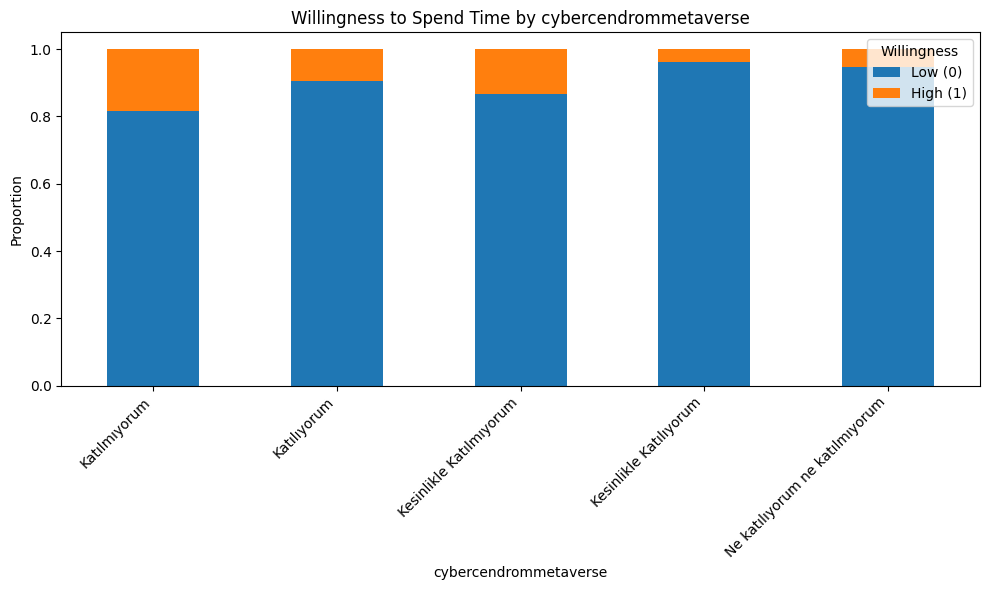



--- Analysis for compatibility.issues ---
Contingency Table (Counts):
willingness_to_spend_time         0   1
compatibility.issues                   
Katılmıyorum                     55   0
Katılıyorum                     137   9
Kesinlikle Katılmıyorum          12   5
Kesinlikle Katılıyorum           33   6
Ne katılıyorum ne katılmıyorum  111  13

Conditional Proportions:
willingness_to_spend_time              0         1
compatibility.issues                              
Katılmıyorum                    1.000000  0.000000
Katılıyorum                     0.938356  0.061644
Kesinlikle Katılmıyorum         0.705882  0.294118
Kesinlikle Katılıyorum          0.846154  0.153846
Ne katılıyorum ne katılmıyorum  0.895161  0.104839

Chi-square Statistic: 18.3675
P-value: 0.0010
Degrees of Freedom: 4


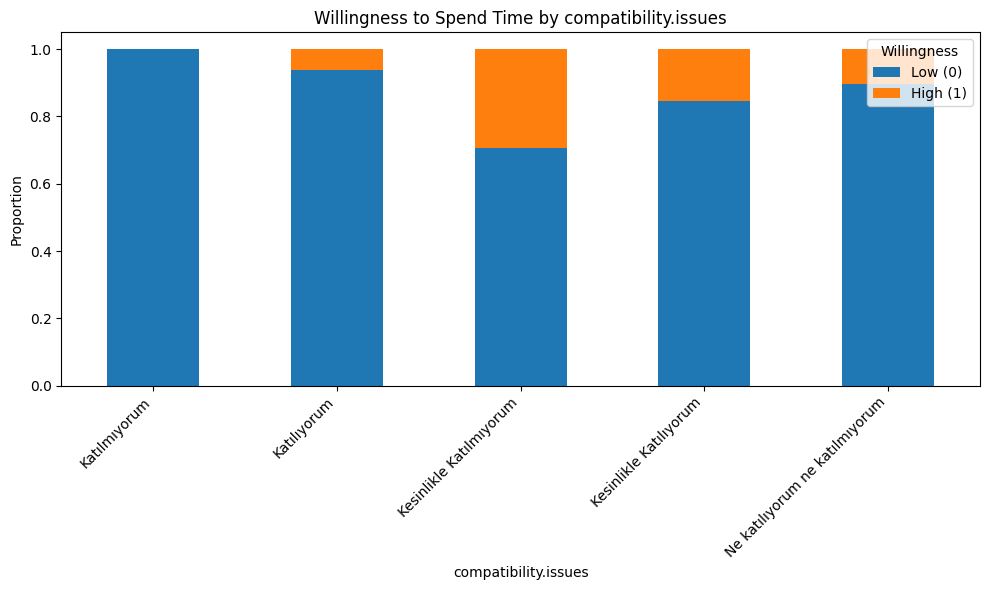



--- Analysis for human.rights.change ---
Contingency Table (Counts):
willingness_to_spend_time         0   1
human.rights.change                    
Katılmıyorum                     68   5
Katılıyorum                      66   8
Kesinlikle Katılmıyorum          38   1
Kesinlikle Katılıyorum           10   7
Ne katılıyorum ne katılmıyorum  166  12

Conditional Proportions:
willingness_to_spend_time              0         1
human.rights.change                               
Katılmıyorum                    0.931507  0.068493
Katılıyorum                     0.891892  0.108108
Kesinlikle Katılmıyorum         0.974359  0.025641
Kesinlikle Katılıyorum          0.588235  0.411765
Ne katılıyorum ne katılmıyorum  0.932584  0.067416

Chi-square Statistic: 26.1154
P-value: 0.0000
Degrees of Freedom: 4


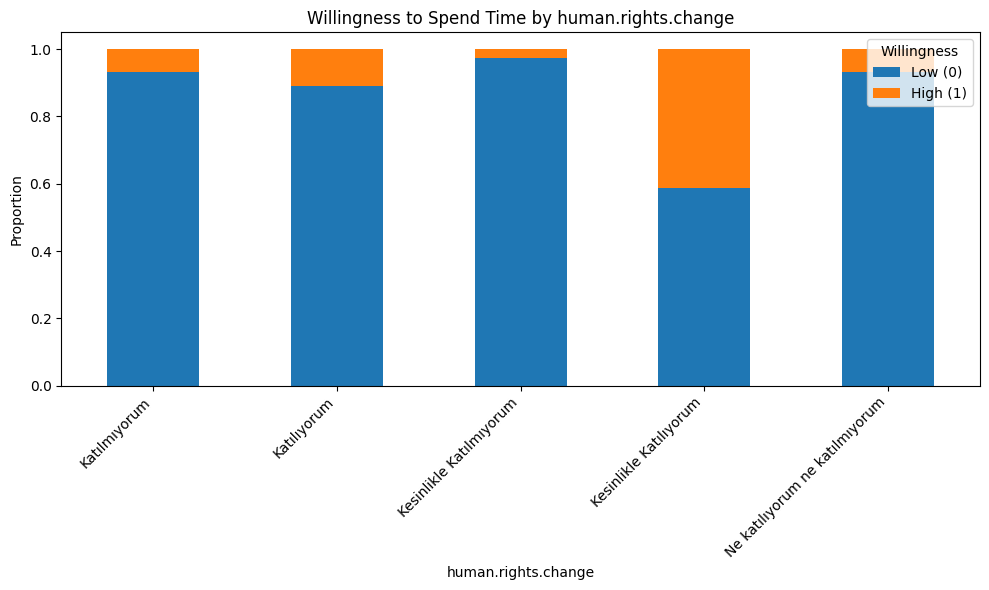



--- Analysis for metaversesocioeconomic ---
Contingency Table (Counts):
willingness_to_spend_time         0   1
metaversesocioeconomic                 
Katılmıyorum                     17   0
Katılıyorum                     156  11
Kesinlikle Katılmıyorum           3   1
Kesinlikle Katılıyorum           96  13
Ne katılıyorum ne katılmıyorum   76   8

Conditional Proportions:
willingness_to_spend_time              0         1
metaversesocioeconomic                            
Katılmıyorum                    1.000000  0.000000
Katılıyorum                     0.934132  0.065868
Kesinlikle Katılmıyorum         0.750000  0.250000
Kesinlikle Katılıyorum          0.880734  0.119266
Ne katılıyorum ne katılmıyorum  0.904762  0.095238

Chi-square Statistic: 5.4182
P-value: 0.2470
Degrees of Freedom: 4


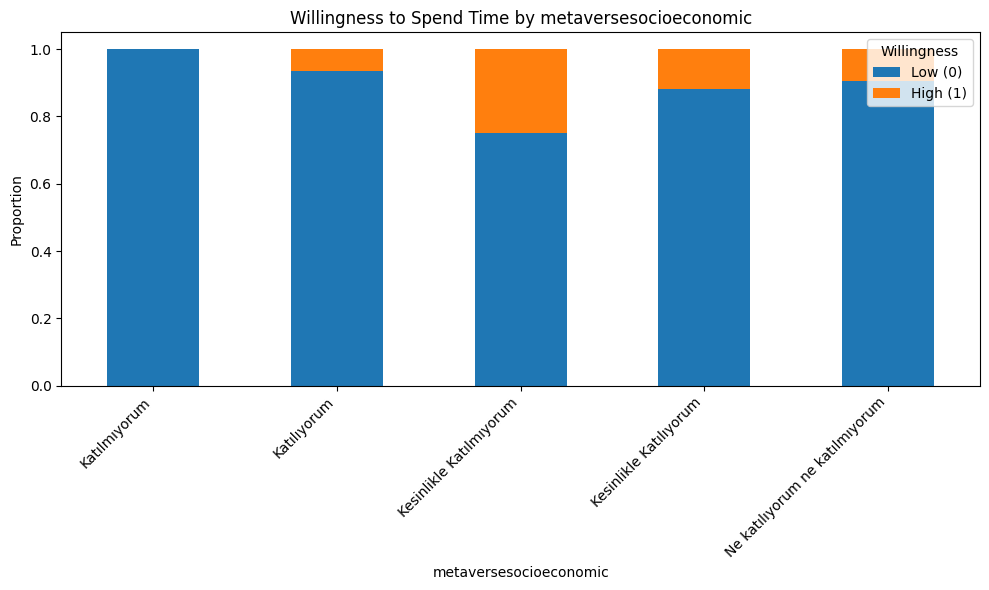

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

variables_to_analyze = [
    'cybercendrommetaverse',
    'compatibility.issues',
    'human.rights.change',
    'metaversesocioeconomic'
]

print("Statistical Analysis and Visualization Results:\n")

for var in variables_to_analyze:
    print(f"--- Analysis for {var} ---")

    # a. Create contingency table
    crosstab = pd.crosstab(df[var], df['willingness_to_spend_time'])
    print("Contingency Table (Counts):")
    print(crosstab)

    # b. Calculate conditional proportions
    props = crosstab.div(crosstab.sum(axis=1), axis=0)
    print("\nConditional Proportions:")
    print(props)

    # c. Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\nChi-square Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")

    # d. Generate stacked bar chart
    ax = props.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Willingness to Spend Time by {var}')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.legend(title='Willingness', labels=['Low (0)', 'High (1)'], loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")

## Logistic Regression



In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

if 'willingness_to_spend_time' not in df.columns:
    df['willingness_to_spend_time'] = df['spend.my.time'].apply(lambda x: 1 if x in ['Katılıyorum', 'Kesinlikle Katılıyorum'] else 0)


def group_compatibility(val):
    if val in ['Katılmıyorum', 'Kesinlikle Katılmıyorum']:
        return 'Disagree_Group'
    return val

df['compatibility_issues_grouped'] = df['compatibility.issues'].apply(group_compatibility)

df_model = df[df['gender'].isin(['Erkek', 'Kadın'])].copy()

independent_vars = [
    'metaverseethic',
    'human.rights.change',
    'compatibility_issues_grouped',
    'cybercendrommetaverse',
    'gender',
    'education'
]


X = pd.get_dummies(df_model[independent_vars], drop_first=True, dtype=int)

y = df_model['willingness_to_spend_time']

X = sm.add_constant(X)

try:
    logit_model = sm.Logit(y, X)
    result_logit = logit_model.fit(disp=0)

    print("Logistic Regression Model Summary:")
    print(result_logit.summary())

    params = result_logit.params
    conf = result_logit.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'Odds Ratio']
    odds_ratios = np.exp(conf)

    print("\nOdds Ratios (95% CI):")
    print(odds_ratios)

except Exception as e:
    print(f"An error occurred during model fitting: {e}")

Logistic Regression Model Summary:
                               Logit Regression Results                              
Dep. Variable:     willingness_to_spend_time   No. Observations:                  375
Model:                                 Logit   Df Residuals:                      356
Method:                                  MLE   Df Model:                           18
Date:                       Wed, 17 Dec 2025   Pseudo R-squ.:                  0.2261
Time:                               20:07:22   Log-Likelihood:                -86.453
converged:                              True   LL-Null:                       -111.71
Covariance Type:                   nonrobust   LLR p-value:                 6.320e-05
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                

In [ ]:
variables_to_analyze = [
    'cybercendrommetaverse',
    'compatibility.issues',
    'human.rights.change',
    'metaversesocioeconomic'
]

print("Unique values and counts for selected variables:")
for var in variables_to_analyze:
    print(f"\n--- {var} ---")
    print(df[var].value_counts())

Unique values and counts for selected variables:

--- cybercendrommetaverse ---
cybercendrommetaverse
Katılıyorum                       148
Ne katılıyorum ne katılmıyorum     92
Kesinlikle Katılıyorum             77
Katılmıyorum                       49
Kesinlikle Katılmıyorum            15
Name: count, dtype: int64

--- compatibility.issues ---
compatibility.issues
Katılıyorum                       146
Ne katılıyorum ne katılmıyorum    124
Katılmıyorum                       55
Kesinlikle Katılıyorum             39
Kesinlikle Katılmıyorum            17
Name: count, dtype: int64

--- human.rights.change ---
human.rights.change
Ne katılıyorum ne katılmıyorum    178
Katılıyorum                        74
Katılmıyorum                       73
Kesinlikle Katılmıyorum            39
Kesinlikle Katılıyorum             17
Name: count, dtype: int64

--- metaversesocioeconomic ---
metaversesocioeconomic
Katılıyorum                       167
Kesinlikle Katılıyorum            109
Ne katılıyorum ne k

##Assumption Check

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

print("=" * 80)
print("ASSUMPTIONS CHECK - FISHER'S EXACT vs CHI-SQUARE")
print("=" * 80)

variables = {
    'education': df['education'],
    'socialmediatime': df['socialmediatime'],
    'metaverse.concept': df['metaverse.concept'],
}

for var_name, var_data in variables.items():
    print(f"\n{'─'*80}")
    print(f"Variable: {var_name}")
    print(f"{'─'*80}")

    crosstab = pd.crosstab(var_data, df['willingness_to_spend_time'])
    print(f"\nCrosstab shape: {crosstab.shape[0]} rows × {crosstab.shape[1]} cols")
    print(crosstab)

    chi2, p_chi2, dof, expected = chi2_contingency(crosstab)

    print(f"\nExpected Frequencies:")
    print(pd.DataFrame(expected,
                       index=crosstab.index,
                       columns=crosstab.columns).round(2))

    # Check assumptions
    print(f"\n1. ASSUMPTION CHECK:")
    print(f"   Total N: {crosstab.sum().sum()}")
    print(f"   Number of cells: {crosstab.shape[0] * crosstab.shape[1]}")

    # Rule 1: All expected ≥ 5
    all_gte_5 = (expected >= 5).all()
    cells_gte_5 = (expected >= 5).sum()
    total_cells = expected.size

    print(f"   Expected freq ≥ 5: {cells_gte_5}/{total_cells} cells")
    print(f"   All ≥ 5? {all_gte_5}")

    # Rule 2: Max 20% cells < 5
    cells_lt_5 = (expected < 5).sum()
    pct_lt_5 = (cells_lt_5 / total_cells) * 100

    print(f"   Expected freq < 5: {cells_lt_5} cells ({pct_lt_5:.1f}%)")
    print(f"   Max 20% < 5? {pct_lt_5 <= 20}")

    # Determine test
    if all_gte_5:
        recommended_test = "Chi-square"
    elif pct_lt_5 <= 20:
        recommended_test = "Chi-square (with caution) or Fisher's"
    else:
        recommended_test = "Fisher's Exact Test (recommended)"

    print(f"\n2. RECOMMENDED TEST:")
    print(f"   {recommended_test}")

    print(f"\n3. ACTUAL TEST RESULTS:")
    print(f"   Chi² = {chi2:.4f}, p = {p_chi2:.4f}")
    print(f"   DoF = {dof}")

ASSUMPTIONS CHECK - FISHER'S EXACT vs CHI-SQUARE

────────────────────────────────────────────────────────────────────────────────
Variable: education
────────────────────────────────────────────────────────────────────────────────

Crosstab shape: 3 rows × 2 cols
willingness_to_spend_time    0   1
education                         
Doktora                     35   4
Lisans                     244  21
Yüksek Lisans               69   8

Expected Frequencies:
willingness_to_spend_time       0      1
education                               
Doktora                     35.62   3.38
Lisans                     242.05  22.95
Yüksek Lisans               70.33   6.67

1. ASSUMPTION CHECK:
   Total N: 381
   Number of cells: 6
   Expected freq ≥ 5: 5/6 cells
   All ≥ 5? False
   Expected freq < 5: 1 cells (16.7%)
   Max 20% < 5? True

2. RECOMMENDED TEST:
   Chi-square (with caution) or Fisher's

3. ACTUAL TEST RESULTS:
   Chi² = 0.5980, p = 0.7416
   DoF = 2

──────────────────────────────────

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

def group_compatibility_fixed(val):
    """Group Disagree categories, handle NaN properly"""
    if pd.isna(val):
        return np.nan  # Explicitly return NaN
    elif val in ['Katılmıyorum', 'Kesinlikle Katılmıyorum']:
        return 'Disagree_Group'
    else:
        return val

df['compatibility_issues_grouped'] = df['compatibility.issues'].apply(group_compatibility_fixed)


analysis_cols = ['metaverseethic', 'human.rights.change',
                 'compatibility_issues_grouped', 'cybercendrommetaverse',
                 'gender', 'education', 'willingness_to_spend_time']

df_valid = df[analysis_cols].dropna()
print(f"   Original N: {len(df)}")
print(f"   Valid N (no NaN): {len(df_valid)}")
print(f"   Rows dropped: {len(df) - len(df_valid)}")


print("\n" + "=" * 80)
print("LOGISTIC REGRESSION ASSUMPTIONS CHECK (CORRECTED)")
print("=" * 80)

print("\n1. SAMPLE SIZE AND EVENTS")
print("─" * 80)

n = len(df_valid)
events = (df_valid['willingness_to_spend_time'] == 1).sum()
non_events = n - events

print(f"Total N (no NaN): {n}")
print(f"Events (High Willingness): {events}")
print(f"Non-Events: {non_events}")
print(f"Events ratio: {events/n*100:.2f}%")

# Count predictors
perception_vars = ['metaverseethic', 'human.rights.change',
                   'compatibility_issues_grouped', 'cybercendrommetaverse']
demographic_vars = ['gender', 'education']

print(f"\nPredictors:")
print(f"  Perception: {len(perception_vars)} variables (Likert)")
print(f"  Demographics: {len(demographic_vars)} variables")

# After one-hot encoding
one_hot_count = 0
for var in perception_vars:
    n_cats = df_valid[var].nunique()
    one_hot_count += (n_cats - 1)

for var in demographic_vars:
    n_cats = df_valid[var].nunique()
    one_hot_count += (n_cats - 1)

print(f"  Total encoded predictors: ~{one_hot_count}")

events_per_pred = events / one_hot_count
print(f"\nEvents per predictor: {events_per_pred:.2f}")

if events_per_pred >= 10:
    print("Adequate (≥ 10)")
elif events_per_pred >= 5:
    print("Borderline (5-10)")
else:
    print("TOO LOW (< 5) - May cause unstable estimates")

print("\n" + "=" * 80)
print("2. MULTICOLLINEARITY CHECK (FIXED)")
print("─" * 80)

likert_map = {
    'Kesinlikle Katılmıyorum': 1,
    'Katılmıyorum': 2,
    'Ne katılıyorum ne katılmıyorum': 3,
    'Katılıyorum': 4,
    'Kesinlikle Katılıyorum': 5
}

perception_numeric = {}
for var in perception_vars:
    perception_numeric[var] = df_valid[var].map(likert_map)

print(f"\n{'Predictor Pair':<50} {'Correlation':<15} {'Status':<15}")
print("─" * 80)

var_pairs = [
    ('metaverseethic', 'human.rights.change'),
    ('metaverseethic', 'compatibility_issues_grouped'),
    ('metaverseethic', 'cybercendrommetaverse'),
    ('human.rights.change', 'compatibility_issues_grouped'),
    ('human.rights.change', 'cybercendrommetaverse'),
    ('compatibility_issues_grouped', 'cybercendrommetaverse'),
]

for var1, var2 in var_pairs:
    if var1 in perception_numeric and var2 in perception_numeric:
        num1 = perception_numeric[var1].dropna()
        num2 = perception_numeric[var2].dropna()

        if len(num1) > 0 and len(num2) > 0 and len(num1) == len(num2):
            corr, pval = spearmanr(num1, num2)

            if abs(corr) < 0.3:
                status = "Low"
            elif abs(corr) < 0.7:
                status = "Moderate"
            else:
                status = "High"

            print(f"{var1} ↔ {var2:<30} {corr:>6.3f}        {status}")
        else:
            print(f"{var1} ↔ {var2:<30} {'N/A':<15} Different N")
